<a href="https://colab.research.google.com/github/MochNad/Pembelajaran-Mesin/blob/main/Job_Sheet_12_(Praktikum%20%2B%20Tugas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Pembelajaran Mesin - Job Sheet 12: Optical Character Recognition (OCR)**
*   Nama : Moch. Nadi Rafli Maulana
*   NIM : 2141720188
*   No. Absen : 18
*   Kelas : TI-3B
*   Jurusan / Prodi : Teknologi Informasi / D4 - Teknik Informatika

> # **🍑 Praktikum 1** *OCR with Pytesseract and OpenCV*

**🍌 Deskripsi**

*Pada praktikum ini kita akan menerapkan teknik OCR dengan menggunakan tesseract dan openCV. Pytesseract or Python-tesseract merupakan alat OCR untuk Python yang juga berfungsi sebagai pembungkus untuk Mesin OCR Tesseract. Ia dapat membaca dan mengenali teks dalam gambar dan umumnya digunakan dalam kasus penggunaan ocr gambar ke teks menggunakan Python.*

*Selain itu juga berguna sebagai skrip panggilan mandiri untuk tesseract, karena dapat membaca semua jenis gambar yang didukung oleh perpustakaan gambar Pillow dan Leptonica, termasuk jpeg, png, gif, bmp, tiff, dan lainnya.*

*referensi lebih lengkap terkait pendekatan Python-tesseract dapat dibaca di [sini](https://github.com/madmaze/pytesseract).*

**🍌 Dataset**

*Dataset merupakan data citra yang digunakan dalam praktikum ini, pastikan koneksi Anda sebelum mengunduh dataset.*

**[DOWNLOAD](https://1drv.ms/u/s!Aibg5RCIk3G4jzvOODytEBZ6R7UP?e=UVw17t)**

**🍌 Instalasi dan Import Library**

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [3]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [4]:
IMG_DIR = 'images/'

**🍌 Preprocessing images dengan OpenCV**

*Pada tahap ini kita akan akan menulis fungsi dasar untuk metode prapemrosesan yang berbeda, meliputi:*

* *grayscaling*
* *thresholding*
* *dilating*
* *eroding*
* *opening*
* *canny edge detection*
* *noise removal*
* *deskwing*
* *template matching*

*Metode yang berbeda dapat berguna untuk jenis gambar yang berbeda*

In [5]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

*Mari kita bekerja dengan sebuah contoh Image untuk melihat segalanya dengan lebih baik. Seperti inilah gambar asli sebelum di proses*

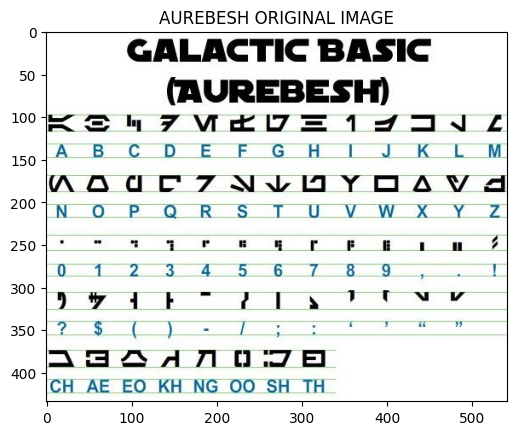

In [6]:
# Plot original image

image = cv2.imread(IMG_DIR + 'aurebesh.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('AUREBESH ORIGINAL IMAGE')
plt.show()

*Selanjutnya lakukan pre-processing, dan setelah dilakukan preprocessing dengan kode berikut, makan akan didapatkan hasil imgae baru*

In [7]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

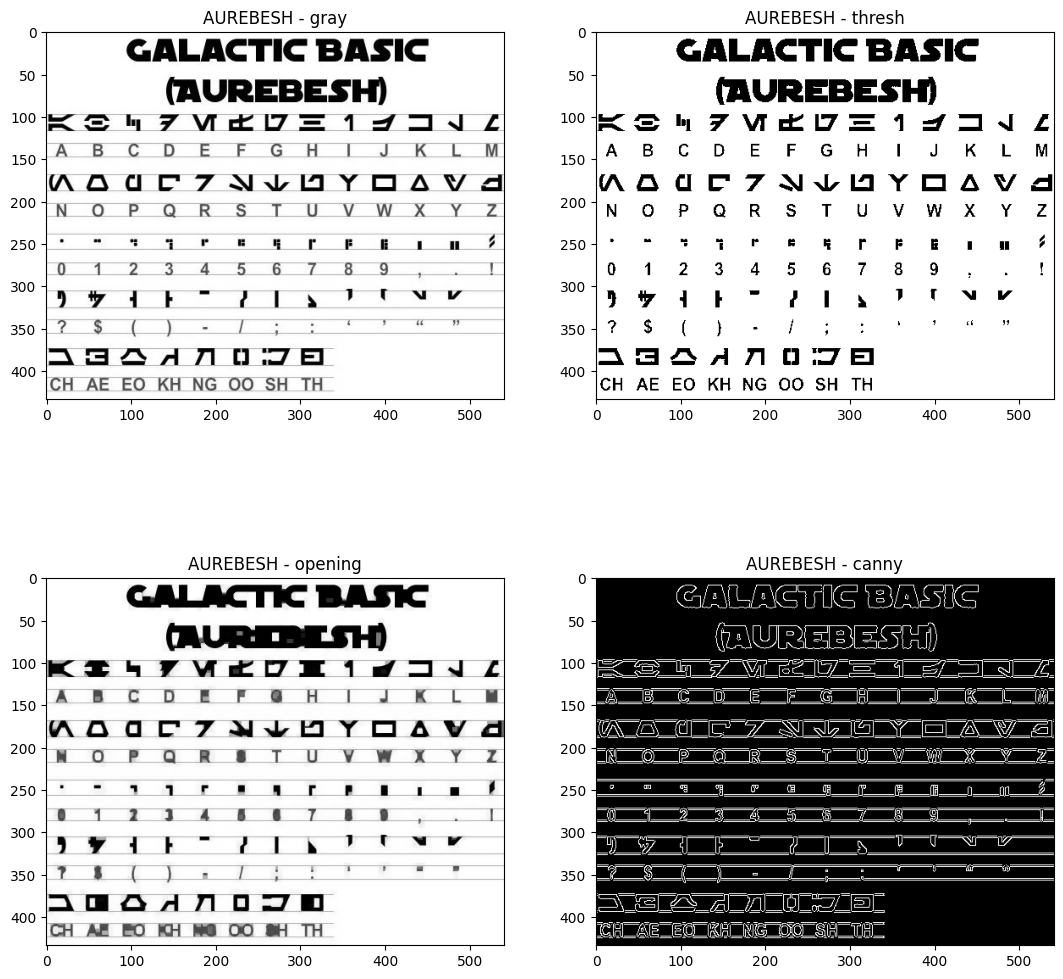

In [8]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

*Langkah selanjutnya akan kita lakukan ekstraksi data dari images tersebut dengan teknik OCR melalui code berikut*

In [9]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> CANNY EDGE IMAGE
-------

> # **🍑 Praktikum 2** *Mendapatkan bounding box di sekitar teks pada image*

**🍌 Deskripsi**

*Saat menjalankan gambar melalui mesin Tesseract OCR, pytesseract memungkinkan pengguna untuk memperoleh informasi bounding box pada:*

1. Tingkat karakter,
2. Tingkat kata,
3. Berdasarkan pola regex.

*Pada praktikum ini, akan dijelaskan cara memperoleh kedua jenis informasi tersebut.*

**🍌 Bounding Box - Level Karakter**

*Dengan menggunakan Pytesseract, Anda dapat memperoleh informasi bounding box untuk hasil OCR dengan menggunakan kode berikut.*

*Skrip di bawah ini akan memberikan informasi bounding box untuk setiap karakter yang terdeteksi oleh tesseract selama proses OCR.*

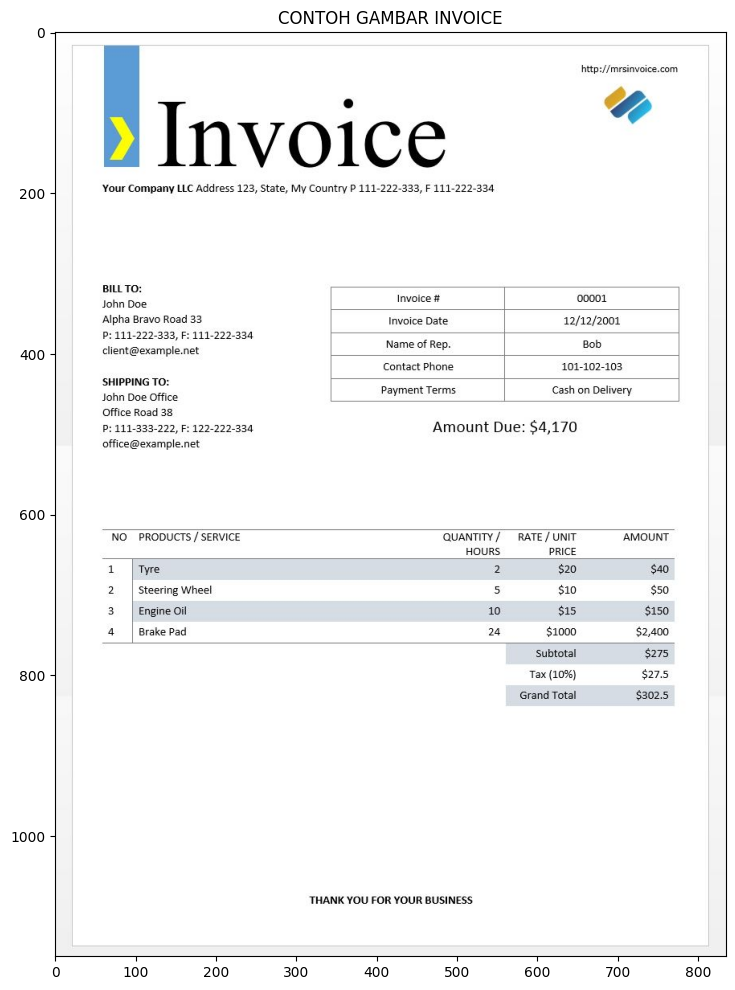

In [10]:
# Plot gambar original

# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH GAMBAR INVOICE')
plt.show()

*Langkah selanjutnya adalah, Plot karakter boxes pada gambar menggunakan fungsi pytesseract.image_to_boxes()*

*kode program berikut akan memberikan hasil bounding box pada image invoice*

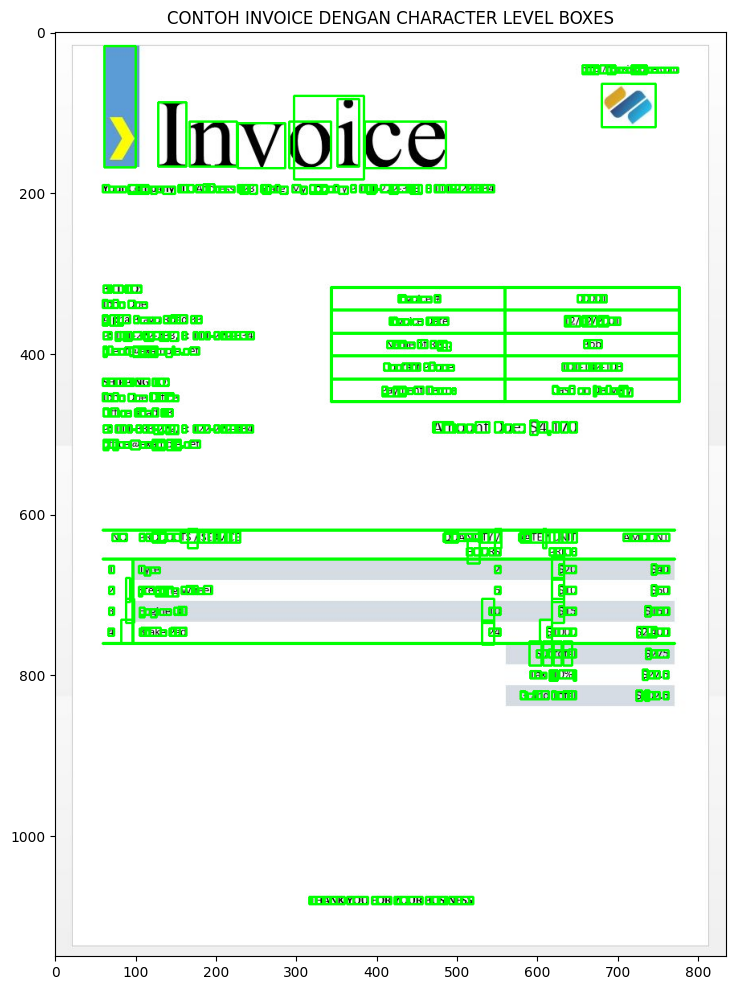

In [11]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN CHARACTER LEVEL BOXES')
plt.show()

**🍌 Bounding Box - Level Kata**

*langkah Selanjutnya kita akan menggunakan gambar contoh invoice di atas untuk menguji hasil output dari Tesseract.*

*Pada Code berikut akan digunakan untuk membaca gambar contoh invoice, kemudian menggunakan fungsi pytesseract.image_to_data() untuk mendapatkan data teks dari gambar.*

In [12]:
# Membaca gambar contoh invoice
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar
d = pytesseract.image_to_data(image, output_type=Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('DATA KEYS: \n', d.keys())

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


*Selanjutnya pada code berikut digunakan untuk memfilter dan hanya menampilkan kotak-kotak kata yang memiliki tingkat kepercayaan (confidence) lebih dari 60%. Hasilnya, gambar contoh invoice akan ditampilkan dengan kotak-kotak yang menandai lokasi setiap kata dengan tingkat kepercayaan yang memenuhi syarat.*

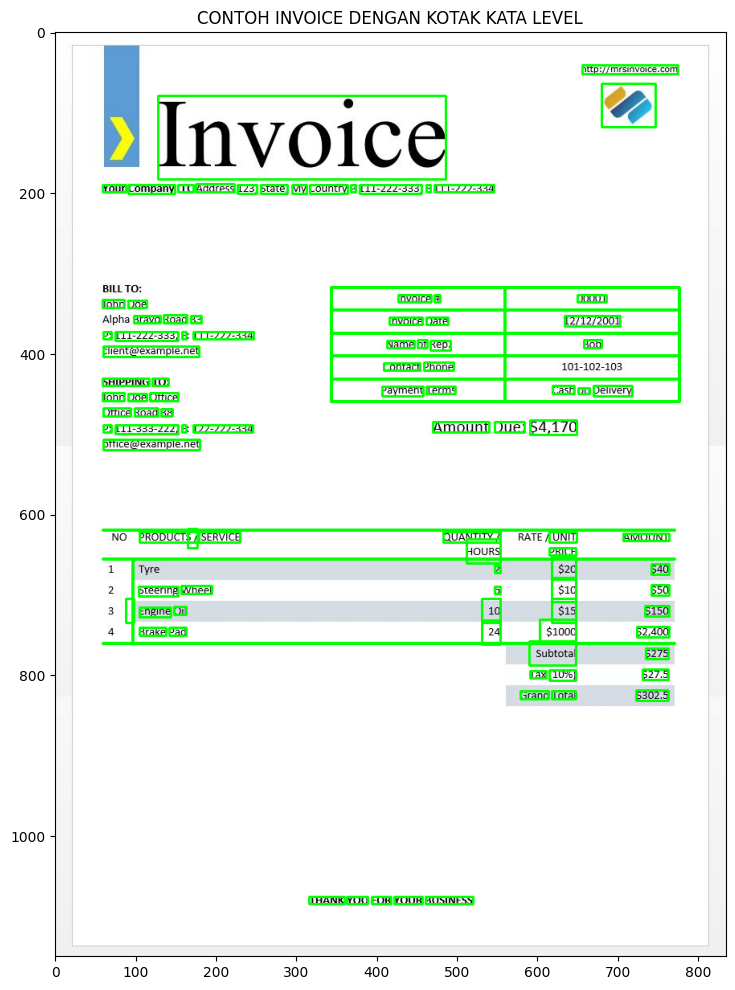

In [13]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK KATA LEVEL')
plt.show()

**🍌 Text template matching - Pola Regex**

*Misalkan kita ingin menemukan di mana suatu tanggal berada dalam sebuah gambar. Di sini, template yang kita akan gunakan berupa pola ekspresi reguler yang akan kita cocokkan dengan hasil OCR kita untuk menemukan kotak-kotak pembatas yang sesuai. Kita akan menggunakan modul regex dan fungsi image_to_data untuk hal ini.*

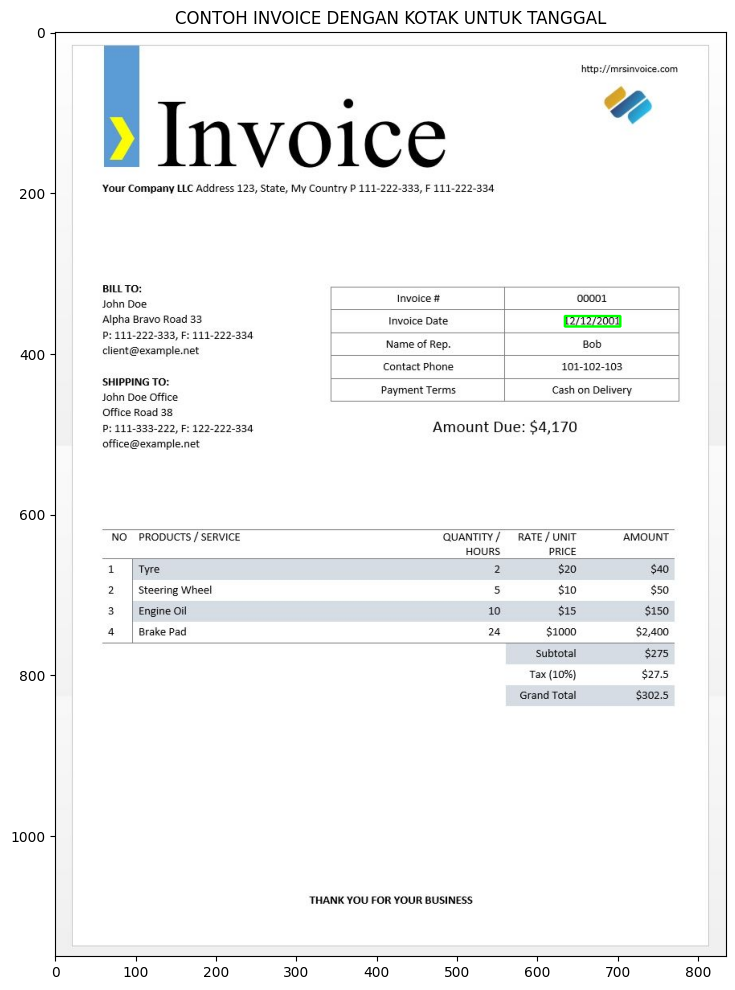

In [14]:
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Pola tanggal dalam format dd/mm/yyyy
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    # Memeriksa apakah kotak memiliki tingkat kepercayaan lebih dari 60%
    if int(d['conf'][i]) > 60:
        # Memeriksa apakah teks di dalam kotak sesuai dengan pola tanggal
        if re.match(date_pattern, d['text'][i]):
            # Mendapatkan koordinat dan ukuran kotak kata
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            # Membuat kotak pada gambar untuk tanggal yang sesuai dengan pola
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak-kotak yang menandai lokasi tanggal
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK UNTUK TANGGAL')
plt.show()

**🍌 Deteksi berbagai bahasa - OCR**

*Anda dapat memeriksa bahasa yang tersedia dan didukung dalam tesseract pada taupan berikut*
> Tesseract memiliki dukungan unicode (UTF-8), dan dapat mengenali lebih dari [100 bahasa](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html) secara langsung.

*Untuk menetapkan bahasa yang diinginkan untuk hasil OCR Anda, gunakan argumen -l LANG dalam konfigurasi di mana LANG adalah kode tiga huruf untuk bahasa yang ingin Anda gunakan.*

*Kode berikut digunakan untuk membaca dan menampilkan gambar yang berisi teks dalam beberapa bahasa. Gambar asli ditampilkan untuk memberikan gambaran tentang kontennya sebelum proses OCR.*

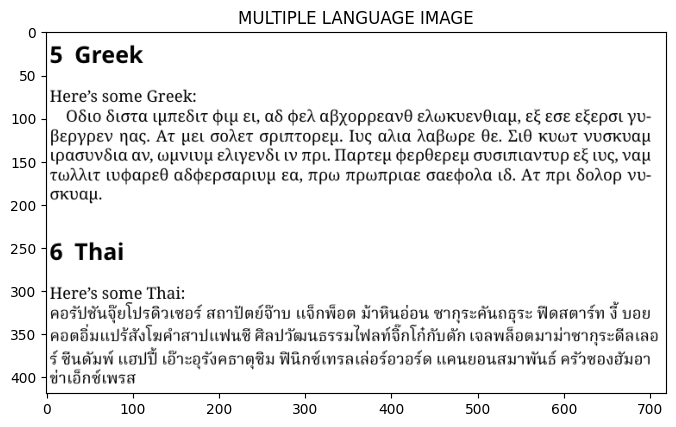

In [15]:
# Membaca gambar asli
image = cv2.imread(IMG_DIR + 'greek-thai.png')

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

*Selanjutnya, Kode berikut digunakan untuk mengekstrak teks dari gambar dengan menggunakan Tesseract OCR. Konfigurasi khusus (custom_config) diterapkan dengan hanya menentukan bahasa Inggris (-l eng). Parameter lain seperti --oem 3 dan --psm 6 juga digunakan untuk mengoptimalkan hasil OCR sesuai kebutuhan.*

In [16]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(image, config=custom_config))

5 Greek
Here’s some Greek:

OSto Stota tuMedit Huy et, aS ea aByoppeave edAwkvevOuay, e§ ece efepot yu-
Bepypev nas. AT Wel GoAET apiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil tv mpL TMaptep bepSepey GvaTLAaVTUp e€€ LUG, Va
TWAALT LUdaped ASdepoapluy Ea, TOW TpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aosUsugulushawos amiaddw usntioa sinfudou winszduagss Haaonsn 3 vos
Aonduusaladrawunud AavTausssulwavianlAdudn wandoamnsiwinsedataa
$ Guduvi woud rvaseasiadu Windinsadosor0sa uausouanrwus aswouduer
didadinsa



<img src = "https://raw.githubusercontent.com/muhamadfarrelrizqullah/machinelearning_2023/main/team4Cihuy.jpg"><p><table>
  <tr>
    <th>Mata Kuliah</th>
    <td>Machine Learning</td>
  </tr>

  <tr>
    <th>Kelompok</th>
    <td>Kelompok 4</td>
  </tr>
  <tr>
    <th>Nama Anggota Kelompok</th>
    <td><p>
    - Moch. Nadi Rafli Maulana / 2141720188<p>
    - Muhammad Lukman Hakim / 2041720109<p>
    - Muhamad Farrel Rizqullah / 2141720243<p>
    - Ramadhan Maulana Akbar S / 2041720072<p>
    - Tifa Amalina / 2141720033<p>
    </td>
  </tr>
</table>

> # **🍑 Tugas**

**🍌 Mendeteksi orientasi teks dan jenis skrip**

*Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.*

**🍌 Tugas:**

1. **🍌 Persiapan Gambar:**

  * *Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').*
  * *Tampilkan gambar asli menggunakan Python dan OpenCV.*
2. **🍌 Deteksi Orientasi dan Skrip:**

  * *Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.*
  * *Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).*
  * *Tampilkan hasil orientasi dan jenis skrip.*

**🍌 Langkah 1: Menampilkan Gambar Asli**

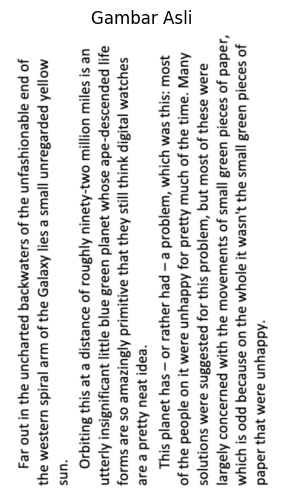

In [48]:
# Menentukan direktori gambar
IMG_DIR = 'images/'  # Ganti dengan path sesuai direktori gambar

# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Memisahkan saluran warna (biru, hijau, merah) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 6))
plt.imshow(rgb_img)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()

**🍌 Langkah 2: Mendeteksi Orientasi Teks Menggunakan Tesseract**

In [49]:
# Mendeteksi orientasi teks menggunakan Tesseract
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
osd_data = pytesseract.image_to_osd(gray_image)

# Menganalisis data skrip untuk mengekstrak orientasi dan jenis skrip
script_lines = osd_data.split('\n')
angle_line = [line for line in script_lines if 'Rotate' in line][0]
angle = int(angle_line.split(':')[-1].strip())

script_line = [line for line in script_lines if 'Script' in line][0]
script_type = script_line.split(':')[-1].strip()

# Menampilkan hasil orientasi dan jenis skrip
print(f'Sudut Rotasi (angle): {angle} derajat')
print(f'Jenis Skrip (script): {script_type}')

Sudut Rotasi (angle): 90 derajat
Jenis Skrip (script): Latin


**🍌 Langkah 3: Merotasi Gambar dan Menampilkan Gambar yang Telah Dirotasi**

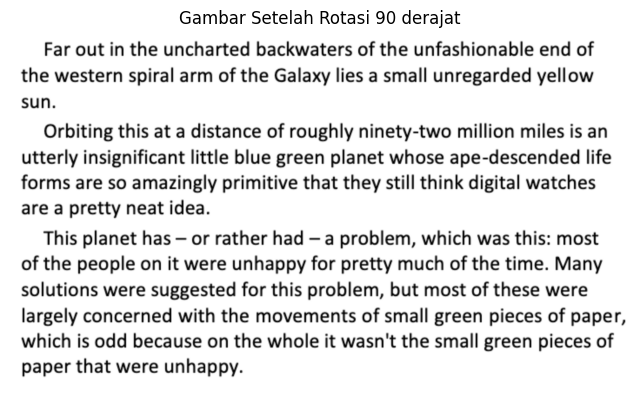

In [50]:
# Rotasi gambar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Menampilkan gambar asli
plt.figure(figsize=(8, 6))
plt.imshow(rotated_image)
plt.axis('off')
plt.title(f'Gambar Setelah Rotasi {angle} derajat' )
plt.show()

**🍌 Langkah 4: Bounding Box - Level Karakter**

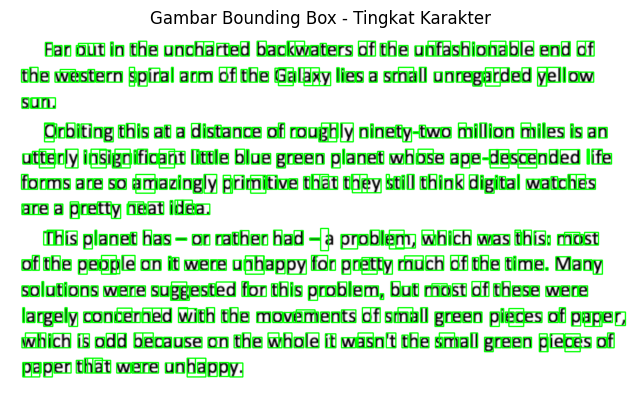

In [51]:
# Rotasi gambar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar yang telah dirotasi
h, w, c = rotated_image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(rotated_image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    karakter_image = cv2.rectangle(rotated_image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(karakter_image)
karakter_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(8, 6))
plt.imshow(karakter_img)
plt.axis('off')
plt.title('Gambar Bounding Box - Tingkat Karakter')
plt.show()

**🍌 Langkah 5: Bounding Box - Level Kata**

KUNCI DATA: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


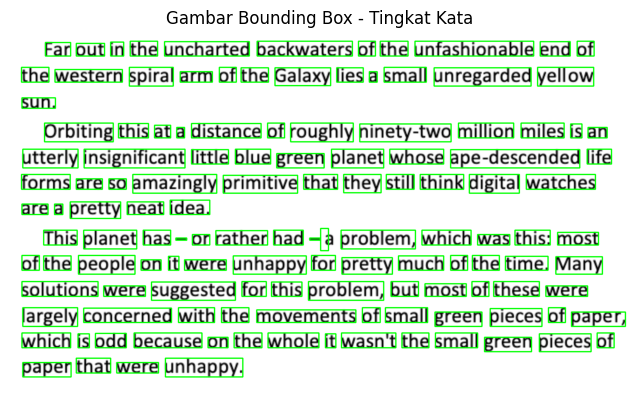

In [52]:
# Rotasi gambar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar yang telah dirotasi
d = pytesseract.image_to_data(rotated_image, output_type=pytesseract.Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('KUNCI DATA: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        kata_image = cv2.rectangle(rotated_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(kata_image)
kata_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(8, 6))
plt.imshow(kata_img)
plt.axis('off')
plt.title('Gambar Bounding Box - Tingkat Kata')
plt.show()

**🍌 Langkah 6: Text template matching - Pola Regex**

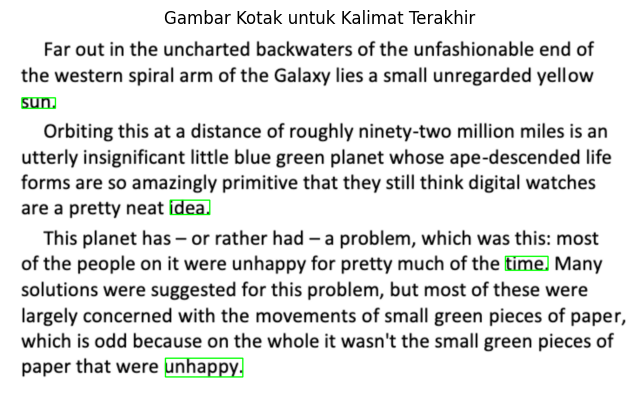

In [55]:
# Rotasi gambar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Pola untuk mencocokkan kalimat terakhir yang diakhiri dengan tanda "."
sentence_pattern = '.*\.$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    # Memeriksa apakah kotak memiliki tingkat kepercayaan lebih dari 60%
    if int(d['conf'][i]) > 60:
        # Memeriksa apakah teks di dalam kotak sesuai dengan pola kalimat terakhir
        if re.match(sentence_pattern, d['text'][i]):
            # Mendapatkan koordinat dan ukuran kotak kata
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            # Membuat kotak pada gambar untuk kalimat terakhir yang sesuai dengan pola
            rotated_image = cv2.rectangle(rotated_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(rotated_image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak-kotak yang menandai lokasi kalimat terakhir
plt.figure(figsize=(8, 6))
plt.imshow(rgb_img)
plt.axis('off')
plt.title('Gambar Kotak untuk Kalimat Terakhir')
plt.show()

**🍌 Langkah 7: Deteksi berbagai bahasa - OCR**

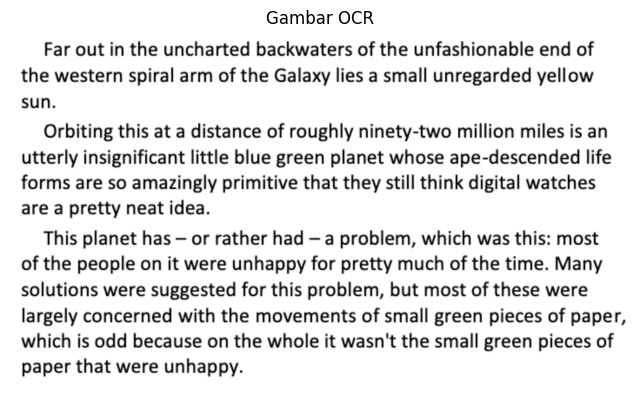

In [60]:
# Rotasi gambar 90 derajat
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(rotated_image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.axis('off')
plt.title('Gambar OCR')
plt.show()

In [57]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(rotated_image, config=custom_config))

Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.

